In [99]:
#importing librabies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [101]:
#uploading dataset
data=pd.read_csv("/content/archive.2.zip",encoding='latin1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.shape

(15509, 10)

In [102]:
#data cleaning
data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [35]:
data.duplicated().sum()

6

In [36]:
data.dropna(inplace=True)

In [37]:
data.isnull().sum()


,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


#data preprocessing

In [38]:
data['Year'] = data['Year'].astype(str)
data["Year"]=data['Year'].str.replace(r'[()]','',regex=True).astype(int)

In [39]:
data['Duration']=pd.to_numeric(data['Duration'].str.replace('min',''))

In [40]:
data['Genre']=data['Genre'].str.split(', ')
data=data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0],inplace=True)

<ipython-input-40-548ecebbf850>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genre'].fillna(data['Genre'].mode()[0],inplace=True)


In [41]:
data['Votes']=pd.to_numeric(data['Votes'].str.replace(',',''))

In [42]:
data['Rating']=pd.to_numeric(data['Rating'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


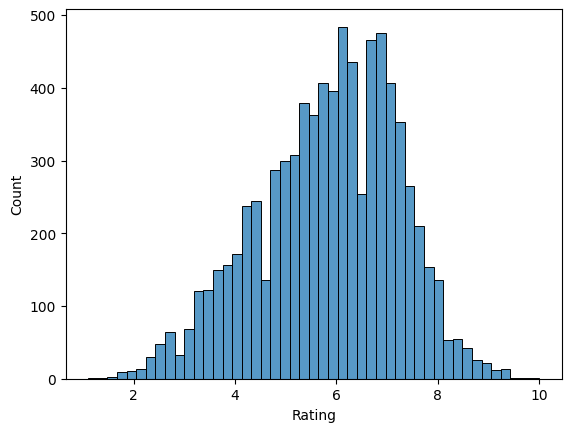

In [103]:
#creating visuals using the data
rating=sns.histplot(data['Rating'])

<Axes: xlabel='Year', ylabel='Rating'>

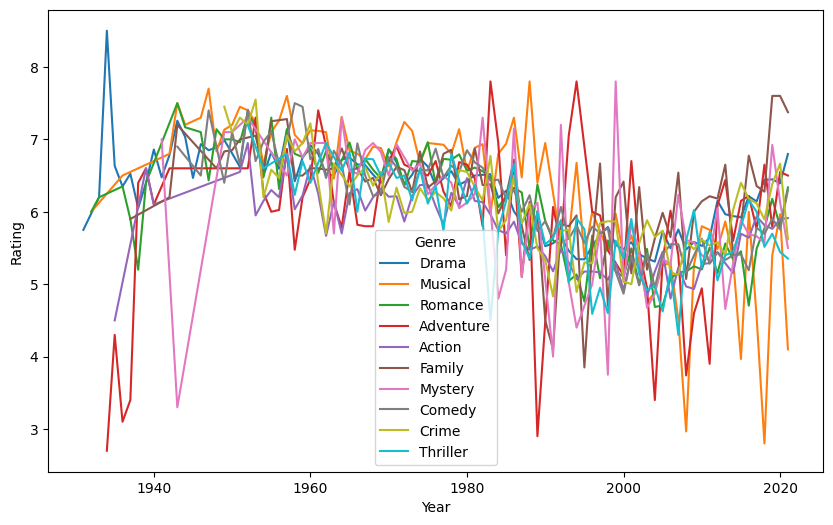

In [58]:

avg_rating_yearwise = data.groupby(['Year', 'Genre'])['Rating'].mean()
top = data['Genre'].value_counts().head(10).index
rating_yearwise = avg_rating_yearwise[avg_rating_yearwise.index.get_level_values('Genre').isin(top)]
rating_yearwise = rating_yearwise.reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rating', hue='Genre', data=rating_yearwise)

In [105]:
#feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [60]:
data.drop(['Name'], axis=1, inplace=True)


#grouping


In [74]:
mean_rating=data.groupby('Genre')['Rating'].transform('mean')
data['Rating']=mean_rating

dir_rating=data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded']=dir_rating

ac1_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor 1_encoded'] = ac1_rating

ac2_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor 2_encoded'] = ac2_rating

ac3_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor 3_encoded'] = ac3_rating

In [75]:
x=data[['Year','Duration','Votes','Director_encoded','Actor 1_encoded','Actor 2_encoded','Actor 3_encoded']]
y=data['Rating']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [106]:
#model buliding
Model=LinearRegression()
Model.fit(X_train,y_train)
Model_pred=Model.predict(X_test)

In [107]:
#evaluating the performance
print("Mean Squared Error:", mean_squared_error(y_test, Model_pred))
print("R-squared:", r2_score(y_test, Model_pred))

Mean Squared Error: 0.05283472109729994
R-squared: 0.44661333075316767


model testing


In [85]:
x.head(7)

,Year,Duration,Votes,Director_encoded,Actor 1_encoded,Actor 2_encoded,Actor 3_encoded
1,2019,109,8,6.056744,6.056744,6.056744,6.056744
3,2019,110,35,5.781064,5.898243,5.781064,5.838006
3,2019,110,35,5.781064,5.898243,5.781064,5.838006
5,1997,147,827,5.832291,5.835795,5.963991,5.992642
5,1997,147,827,5.832291,5.835795,5.963991,5.992642
5,1997,147,827,5.832291,5.835795,5.963991,5.992642
6,2005,142,1086,5.864459,5.782709,5.888509,5.892951


In [86]:
y.head(7)

,Rating
1,6.056744
3,5.751042
3,5.811087
5,5.751042
5,6.056744
5,6.246845
6,6.056744


In [94]:
#for testing the model
data={'Year':2005,  'Duration':[145], 'Votes':[1076], 'Director_encoded':[5.7],	'Actor 1_encoded':[5.6],	'Actor 2_encoded':[5.8],	'Actor 3_encoded':[5.7]}
example=pd.DataFrame(data)

In [96]:
prediction=Model.predict(example)
print("predicted rating:",prediction)

predicted rating: [5.6666251]
